In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
from math import sqrt

In [42]:
data = pd.read_excel("Data/Data3.xlsx")

In [43]:
display(data)

,costoTotalMinMax,nivelServicio,FO,tiempoDescansando,tiempoGuardando,tiempoPickeando,tiempoDescargando,tiepoEsperaGuardado,tiempoEsperaPickeando,tiempoEsperaDescargando,cantidadRacks,PTL,operariosGrupoMODO,CostoTotal,Escenario
0,0.458333,0.563636,0.557045,95205.674804,67247.910213,724.736102,3166.516470,3.498263,0.020948,0.015343,1,True,0,11000,1TRUE0
1,0.541667,0.665217,0.603152,93850.012856,68338.102253,848.307490,3203.235498,7.572865,0.032088,0.032783,3,True,0,13000,3TRUE0
2,0.500000,0.329412,0.380588,96218.548802,66075.127044,898.409661,3138.176628,4.605483,0.017990,0.020378,2,True,0,12000,2TRUE0
3,0.583333,0.416667,0.416667,160317.591312,68690.218632,490.825220,3211.508409,6.834608,0.092360,0.029587,1,True,10,14000,1TRUE10
4,0.708333,0.400000,0.367500,226968.926208,68066.796266,472.895662,3202.701487,8.583117,0.115988,0.037318,1,True,20,17000,1TRUE20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2515,0.000000,0.383562,0.568493,89781.793385,72966.100789,527.748394,3195.603694,12.687915,0.171458,0.055165,0,False,0,0,0FALSE0
2516,0.062500,0.375000,0.543750,121538.668554,74600.096932,518.157431,3264.705722,7.981800,0.106424,0.033965,0,False,5,1500,0FALSE5
2517,0.312500,0.397260,0.484332,255701.423693,73013.227282,511.832455,3189.989994,14.288972,0.190520,0.062126,0,False,25,7500,0FALSE25
2518,0.187500,0.356164,0.493065,190044.290440,72527.932775,503.673603,3178.512021,9.274781,0.125335,0.040501,0,False,15,4500,0FALSE15


In [50]:
data['E'] = ''
data.loc[data['PTL'], 'E'] = data['cantidadRacks'].astype(str) +'R '+ data['operariosGrupoMODO'].astype(str) +'O'
data.loc[data['PTL'] == False, 'E'] = data['operariosGrupoMODO'].astype(str) +'O'
data.loc[data['Escenario'] == '0FALSE0', 'E'] = 'CasoBase'

## Caso Base:

Se estudia el Caso Base para Validar que cumplan con los estandares de la realidad.
El caso base representa a la Situacion Actual en el que no se implementa Pick To Light ni tampoco se contratan empleados extra. 

In [15]:
casoBase = data[data['Escenario']=='0FALSE0']

In [35]:
# Obtener las columnas a las que aplicar el proceso, excluyendo las últimas cuatro
columnas_a_procesar = casoBase.columns[:-4]

In [36]:
# Lista para almacenar los DataFrames resultantes
resultados = []

# Bucle para aplicar el proceso a cada columna
for col in columnas_a_procesar:
    group = casoBase.groupby('Escenario').agg({col: ['max', 'min', 'mean', 'std', 'count']})
    group = group.reset_index()
    # Aplanar el MultiIndex en las columnas
    group.columns = ['Escenario', 'Max', 'Min', 'Mean', 'Std', 'Count']
    # Agregar columna que indica la variable
    group['Variable'] = col
    resultados.append(group)

In [39]:
# Concatenar todos los DataFrames en uno solo
casoBaseResumen = pd.concat(resultados)

In [40]:
casoBaseResumen

,Escenario,Max,Min,Mean,Std,Count,Variable
0,0FALSE0,0.000000,0.000000,0.000000,0.000000,60,costoTotalMinMax
0,0FALSE0,0.400000,0.347222,0.372252,0.012697,60,nivelServicio
0,0FALSE0,0.580000,0.543056,0.560576,0.008888,60,FO
0,0FALSE0,92438.556528,87278.144562,89790.053793,1054.959802,60,tiempoDescansando
0,0FALSE0,75620.277159,70676.199080,73042.982764,995.763969,60,tiempoGuardando
0,0FALSE0,572.972391,498.295023,530.941721,16.670949,60,tiempoPickeando
0,0FALSE0,3295.063234,3100.906337,3192.369247,38.271407,60,tiempoDescargando
0,0FALSE0,17.465805,2.202554,9.149535,3.488988,60,tiepoEsperaGuardado
0,0FALSE0,0.226829,0.029367,0.121100,0.045625,60,tiempoEsperaPickeando
0,0FALSE0,0.075284,0.009535,0.039779,0.015161,60,tiempoEsperaDescargando


In [41]:
casoBaseResumen.to_excel("Data/ResumenCasoBase.xlsx")

## Plan de Cuadros:

In [52]:
# Ordena los datos por PTL, cantidadRacks y operariosGrupoMODO
data = data.sort_values(by=['PTL', 'cantidadRacks', 'operariosGrupoMODO'])

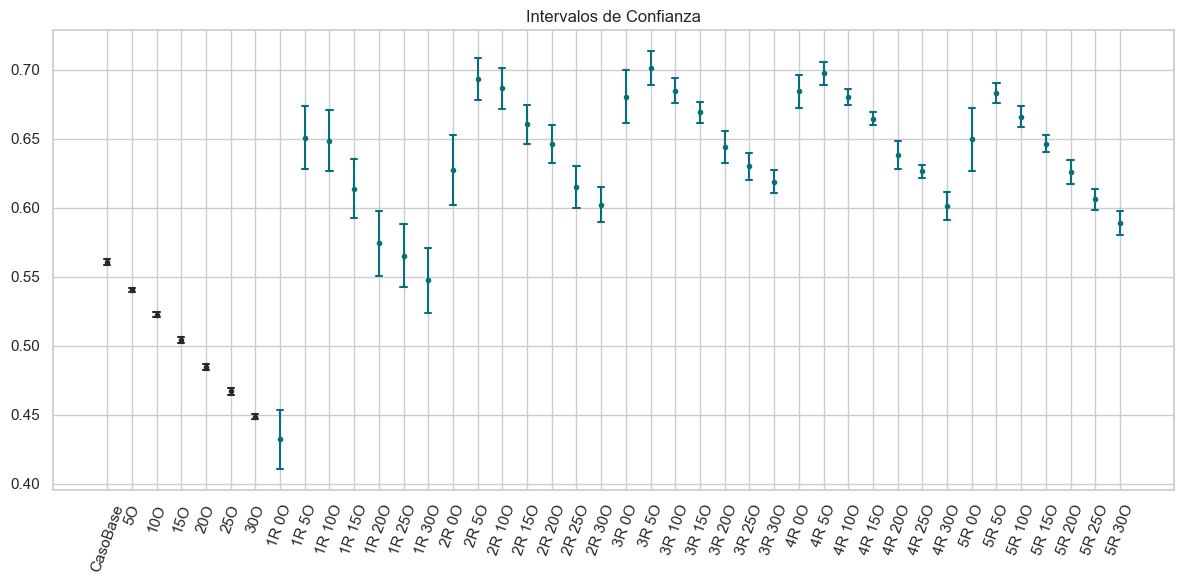

In [55]:
def plot_confidence_interval(x, values, z=1.96, color='#076F79', horizontal_line_width=0.25):
    mean = statistics.mean(values)
    stdev = statistics.stdev(values)
    confidence_interval = z * stdev / sqrt(len(values))

    left = x - horizontal_line_width / 2
    top = mean - confidence_interval
    right = x + horizontal_line_width / 2
    bottom = mean + confidence_interval
    plt.plot([x, x], [top, bottom], color=color)
    plt.plot([left, right], [top, top], color=color)
    plt.plot([left, right], [bottom, bottom], color=color)
    plt.plot(x, mean, 'o', color=color, markersize=3)

    return mean, confidence_interval

plt.figure(figsize=(12, 6)) 

# Asignar colores según el valor de PTL
color_map = {True: '#076F79', False: '#282a29'}

plt.title('Intervalos de Confianza')

# Utilizar la columna 'E' para las etiquetas
etiquetas = data['E'].unique()

for x in range(len(etiquetas)):
    valores = data[data['E'] == etiquetas[x]]['FO'].tolist()
    # Obtener el valor de PTL para el escenario actual (asumiendo que PTL es constante para cada etiqueta 'E')
    ptl_value = data[data['E'] == etiquetas[x]]['PTL'].iloc[0]
    color = color_map[ptl_value]
    plot_confidence_interval(x, valores, color=color)

plt.xticks(range(len(etiquetas)), etiquetas, rotation=70)
plt.tight_layout()
plt.show()
